In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv(r'mnist_train.csv')
test = pd.read_csv(r'mnist_test.csv')
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
x = train.drop('label',axis=1)
y = train['label'].copy()
X_train = x.to_numpy()
Y_train = y.to_numpy()#because reshape not work with dataframe or series

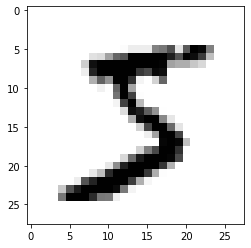

5


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X_train[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation="nearest")#cmap used to colormap
#here binary means black and white if you don't write then it will get colored and 
#interpolation method to construct new data point within range
plt.show()
print(Y_train[0])
some_digit_image


In [5]:
X_test = test.drop('label',axis=1).to_numpy()
Y_test = test['label'].copy().to_numpy()

In [6]:
Y_train_5 = (Y_train==5)
Y_test_5 = (Y_test==5)

# Binary Classifier


only try to classify one number
we are classifing 5 or not5

### Stochastic Gradient Descent (SGD) classifier

In [7]:
from sklearn.linear_model import SGDClassifier

sgd_clas = SGDClassifier()
sgd_clas.fit(X_train,Y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
print(X_train.shape,Y_train_5.shape)
print(X_train[0].shape)
sgd_clas.predict([some_digit])

(60000, 784) (60000,)
(784,)


array([ True])

# Performance Measures

### Implementing Cross Validation

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfold = StratifiedKFold(n_splits = 3,random_state = 42)

for train_index,test_index in skfold.split(X_train,Y_train_5):
    clone_clf = clone(sgd_clas)
    X_train_folds = X_train[train_index]
    y_train_folds = Y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = Y_train_5[test_index]
    
    clone_clf.fit(X_train_folds,y_train_folds)
    Y_predict = clone_clf.predict(X_test_fold)
    n_correct = sum(Y_predict == y_test_fold)
    print(n_correct/len(Y_predict))

0.96525
0.954
0.9614


In [10]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clas,X_train,Y_train_5,cv=3,scoring="accuracy")

array([0.9681 , 0.9571 , 0.95095])

accuracy is generally not the perfomance measure for classifier .
A much better option is to look at the confusion matrix

### Confusion Matrix

To compute confusion matrix you first need to have a set of prediction

In [11]:
#you have to use the test set but we use it at last so we use cross_val_predict

from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(sgd_clas,X_train,Y_train_5,cv=3)
#it is just similiar to cross_val_score but we are not scoring


In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_train_5,y_predict)
#first row is class of non 5s      xaxis-  predicted    yaxis-  y_train_5
#53332 predicted false Y_train_5  false (true negative)
#1247 predicted true y_train_5 false    (false positive)
#1178 predicted false y_train_5 true    (false negative)
#4243 predicted true y_train_5 true     (true positive)

array([[53701,   878],
       [ 1362,  4059]])

In [13]:
confusion_matrix(y_predict,y_predict)

array([[55063,     0],
       [    0,  4937]])

#### precision = TP/(TP+FP)  and recall = TP/(TP+FN)    
#### precision = True Positive/No. of predicated positive   
#### recall = True positive/No. of actual positive


In [14]:
from sklearn.metrics import precision_score,recall_score

print(precision_score(Y_train_5,y_predict))
print(recall_score(Y_train_5,y_predict))
#when it claim image is 5 it is correct only 77.2% and it only detect 78.2% 5 

0.8221592059955438
0.7487548422800221


combination of precision and recall is F1 score

 F1 = 2/(1/precision + 1/recall)

In [15]:
from sklearn.metrics import f1_score

f1_score(Y_train_5,y_predict)

0.7837420351419192

increasing precision reduces recall, and vice versa.This is called the precision/recall Tradeoff

### Precision/Recall Tradeoff 

In [16]:
#please check imgae on page 88
y_scores = sgd_clas.decision_function([X_train[20000]])
#what is this decision_function do 
y_scores

array([6882.23769831])

In [17]:
thresold = 0
y_some_digit_pred = (y_scores>thresold)
print(y_some_digit_pred)

[ True]


In [18]:
thresold = 10000
y_some_digit_pred = (y_scores>thresold)
print(y_some_digit_pred)
#raising the thresold decrese recall 
#????????????HOW?????????

[False]


So how can you decide which thresold to use?


In [19]:
#cross_val_predict function we use method decision_function

y_scores = cross_val_predict(sgd_clas,X_train,Y_train_5,cv=3,method='decision_function')
#now we will compute precision and recall for all possible threshold values

from sklearn.metrics import precision_recall_curve

precision,recall,threshold = precision_recall_curve(Y_train_5,y_scores)

In [20]:
print(y_scores)


[ 17114.04219947 -26184.59359679 -35812.89823237 ...   3124.28228486
  -7125.91192715  -7994.62782338]


In [21]:
def curve(precision,recall,threshold):
    plt.plot(threshold,precision[:-1],"b--",label="precision")
    plt.plot(threshold,recall[:-1],"r--",label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])
    

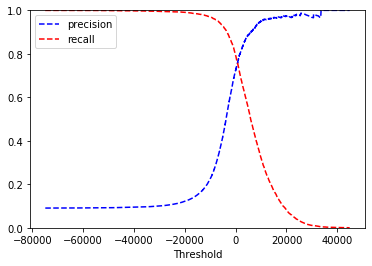

In [22]:
curve(precision,recall,threshold)
plt.show()

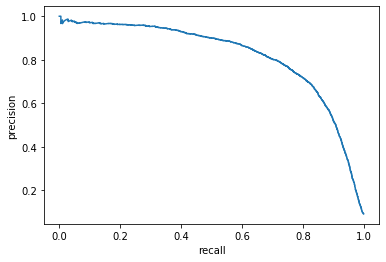

In [23]:
plt.plot(recall[:-1],precision[:-1])
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

In [24]:
y_train_pred_90 = (y_scores>5000)

print(precision_score(Y_train_5,y_train_pred_90))
print(recall_score(Y_train_5,y_train_pred_90))


0.8870679380214541
0.5491606714628298


In [25]:
#you have 90% precision of this classifier
confusion_matrix(Y_train_5,y_train_pred_90)

array([[54200,   379],
       [ 2444,  2977]])

In [26]:
y_predict

array([ True, False, False, ...,  True, False, False])

In [27]:
y_train_pred_90

array([ True, False, False, ..., False, False, False])

# The ROC Curve 

### The receiver operating characteristic(ROC) another tool used with binary classifier . It is similiar to recall/precision curve, it plot true positive rate (recall) versus false positive rate(1-true negative rate)(1-specificity).

In [28]:
from sklearn.metrics import roc_curve

fpr,tpr,threshold = roc_curve(Y_train_5,y_scores)

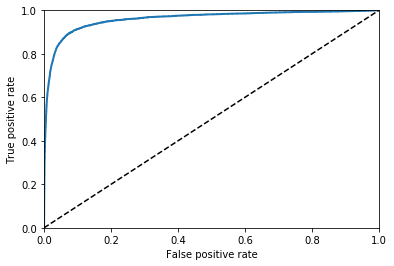

0.9601837964406856

In [29]:
plt.plot(fpr,tpr,linewidth=2)
plt.axis([0, 1, 0, 1])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()
#more trp more fpr
#the dotted line represent roc curve of random classifier


#one way to compare classifier is to measure the area under the curve(AUC) 
#a perfect classifier has AUC 1 and purely classifier will has AUC 0.5

from sklearn.metrics import roc_auc_score

roc_auc_score(Y_train_5,y_scores)
#when you care about recall more roc curve and precision case use 

#looking at the ROC curve (and the ROC AUC score), you may think that the classifier is really good. 
#But this is mostly because there are few positives (5s) compared to the negatives (non-5s). In contrast, 
#the PR curve makes it clear that the classifier has room for improvement (the curve could be closer to the 
#top- right corner)

## RandomForestClassifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

y_forest_pred = cross_val_predict(forest_clf,X_train,Y_train_5,cv=3,method="predict_proba")
#randomforestclassifier doesn't have decision_function


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [31]:
y_forest_pred

array([[0.1, 0.9],
       [1. , 0. ],
       [0.9, 0.1],
       ...,
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ]])

In [32]:
y_score_forest = y_forest_pred[:,1]

In [33]:
fpr_forest,tpr_forest,threshold = roc_curve(Y_train_5,y_score_forest)

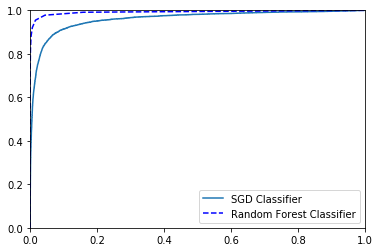

In [34]:
plt.plot(fpr,tpr,label="SGD Classifier")
plt.plot(fpr_forest,tpr_forest,"b--",label="Random Forest Classifier")
plt.axis([0,1,0,1])
plt.legend(loc="lower right")
plt.show()

In [35]:
roc_auc_score(Y_train_5,y_score_forest)

0.9920527492698306

# MultiClass Classification

Some algorithm like Random Foreset Classifier or Naive Bayes Classifier are capable of handle multiclass .
Others like SVM or linear classifier are not

In [36]:
sgd_clas.fit(X_train,Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [37]:
sgd_clas.predict([some_digit])

array([5])

In [38]:
some_digit_score = sgd_clas.decision_function([some_digit])
some_digit_score

array([[-31319.80275701, -28078.36607225,  -9735.28826314,
         -4472.29840546, -28592.80743928,   -146.91019919,
        -20171.74801159, -10083.31809648, -12159.18306889,
        -10784.64539202]])

In [39]:
np.argmax(some_digit_score)

5

In [40]:
sgd_clas.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
sgd_clas.classes_[5]

5

In [42]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train,Y_train)


OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=42, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   n_jobs=None)

In [43]:
ovo_clf.predict([some_digit])

array([5])

In [44]:
forest_clf.fit(X_train,Y_train)
forest_clf.predict([some_digit])

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([5])

In [45]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0.2, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [46]:
cross_val_score(sgd_clas,X_train,Y_train,cv=3,scoring="accuracy")

array([0.8825235 , 0.87314366, 0.87093064])

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [48]:
cross_val_score(sgd_clas,X_train_scaled,Y_train,cv=3,scoring='accuracy')

array([0.90002   , 0.89074454, 0.90103516])

# Error Analysis

In [49]:
y_train_pred = cross_val_predict(sgd_clas,X_train_scaled,Y_train,cv=3)
cnf = confusion_matrix(Y_train,y_train_pred)
cnf

array([[5577,    0,   23,    5,    8,   50,   38,    6,  215,    1],
       [   1, 6399,   39,   22,    4,   43,    4,    7,  213,   10],
       [  27,   27, 5240,   93,   72,   25,   65,   39,  359,   11],
       [  22,   18,  118, 5224,    2,  214,   25,   40,  396,   72],
       [  12,   14,   47,    9, 5189,   12,   35,   24,  334,  166],
       [  26,   15,   29,  165,   54, 4471,   73,   16,  512,   60],
       [  27,   16,   43,    2,   44,   96, 5550,    6,  133,    1],
       [  19,   10,   52,   29,   50,   15,    3, 5700,  178,  209],
       [  17,   65,   50,   87,    3,  132,   25,   10, 5418,   44],
       [  25,   18,   29,   65,  117,   36,    1,  181,  361, 5116]])

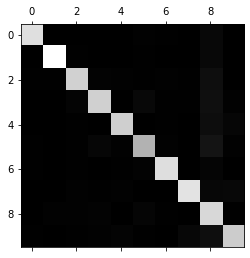

In [50]:
plt.matshow(cnf,cmap=plt.cm.gray)
plt.show()

In [51]:
row_sum = cnf.sum(axis=1,keepdims=True)
norm_cnf = cnf/row_sum

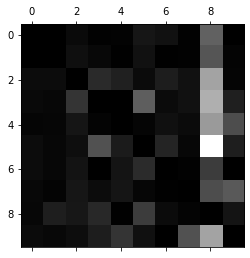

In [52]:
np.fill_diagonal(norm_cnf,0)
plt.matshow(norm_cnf,cmap=plt.cm.gray)
plt.show()

# Multilabel Classification

### KNeighbors Classifier 

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

y_train_large = (Y_train >= 7)
y_train_odd = (Y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]#concate 

In [55]:
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [56]:
knn_clf.fit(X_train,y_multilabel)
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
y_train_cnn_pred = cross_val_predict(knn_clf,X_train,Y_train,cv=3) 

In [ ]:
print(y_train_cnn_pred)
f1_score(Y_train,y_train_cnn_pred,avergae="macro")

# Multioutput classifier

In [ ]:
noise = rnd.randint(0, 100, (len(X_train), 784))
noise = rnd.randint(0, 100, (len(X_test), 784))
X_train_mod = X_train + noise
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test


In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plt.imshow(clean_digit.reshape(28,28),cmap = matplotlib.cm.binary)
plt.show()